<p><b>Pyber Ride Sharing Data Analysis</b></p>
<p>Trends Noticed:
<p>1. The highest fare on average is earned by drivers in rural cities. </p>
<p>2. Pyber Ride Sharing generates the most revenue in urban cities. </p>
<p>3. The number of drivers present in a city is directly proportionate to the number of rides in a city, and inversely proportionate to the average fare in the city (Most likely due to demand and supply-based pricing).</p>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import scipy
import matplotlib.patches as mpatches



In [2]:
path1 = os.path.join("raw_data", "city_data.csv")
df_1 = pd.read_csv(path1)
df_1.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [3]:
path2 = os.path.join("raw_data", "ride_data.csv")
df_2 = pd.read_csv(path2)
#df_2.head()

In [4]:
city_ride_data = df_2.groupby("city")
ride_data = city_ride_data["fare"].mean()
ride_data = pd.DataFrame(ride_data)
ride_data["Total Number of Rides Per City"] = city_ride_data["ride_id"].nunique()
ride_data.reset_index(inplace=True)
ride_data.rename(columns={"fare":"Average Fare ($) Per City"},inplace=True)

#ride_data.head()


In [5]:
final_data = pd.merge(ride_data, df_1, on="city")
final_data.head()

,city,Average Fare ($) Per City,Total Number of Rides Per City,driver_count,type
0,Alvarezhaven,23.928710,31,21,Urban
1,Alyssaberg,20.609615,26,67,Urban
2,Anitamouth,37.315556,9,16,Suburban
3,Antoniomouth,23.625000,22,21,Urban
4,Aprilchester,21.981579,19,49,Urban


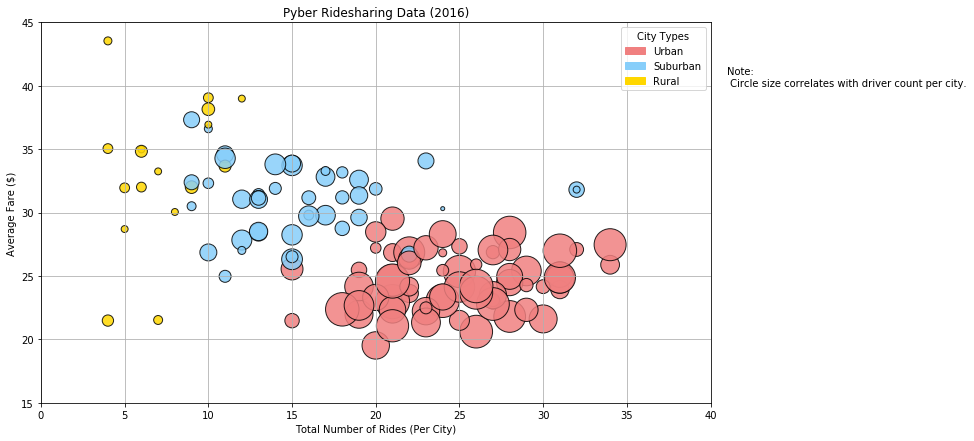

In [6]:
final_data["coloring"]= final_data["type"]

final_data.loc[:, 'coloring'].replace(["Urban", "Suburban", "Rural"], ["lightcoral", "lightskyblue", "Gold"],
                                      inplace=True)
colors= final_data["coloring"].values

fig = final_data.plot(kind="scatter", x="Total Number of Rides Per City", y="Average Fare ($) Per City", 
              sizes=final_data['driver_count']*16 ,
              grid=True, figsize=(12, 7), 
              color=colors,
              alpha=0.85,
              edgecolors="black",
              #label=np.array['type 0', 'type 1', 'type 2'],
              title="Pyber Ridesharing Data (2016)",
              linewidths=1,legend=True
               )
#print(plt.xlim)
plt.xlim((0, 40))
plt.ylim(15, 45)
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')


one = mpatches.Patch(color='lightcoral', label='Urban')
two = mpatches.Patch(color='lightskyblue', label='Suburban')
three = mpatches.Patch(color='Gold', label='Rural')

plt.legend(title="City Types", handles=[one, two, three])

final_data.head()

txt="Note:\n Circle size correlates with driver count per city."
fig.text(41, 40, txt, ha='left')



#final_data.groupby("type")["type"].shape
#Things missing:
# - legend


plt.show()


In [7]:
# % of Total Fares by City Type
# % of Total Rides by City Type
# % of Total Drivers by City Type

city_type = final_data.groupby("type")
type_df = {}
type_df["Total Rides"] = city_type["Total Number of Rides Per City"].sum()
type_df["driver_count"] = city_type["driver_count"].sum()
type_df["avg fare"] = city_type["Average Fare ($) Per City"].mean()

type_df = pd.DataFrame(type_df)

type_df["Total fares"] = type_df["Total Rides"]*type_df["avg fare"]
# city_type_df.reset_index(inplace=True)
type_df.head()

,Total Rides,avg fare,driver_count,Total fares
type,,,,
Rural,125,34.207143,104,4275.892860
Suburban,657,30.962713,638,20342.502555
Urban,1625,24.603991,2607,39981.484982


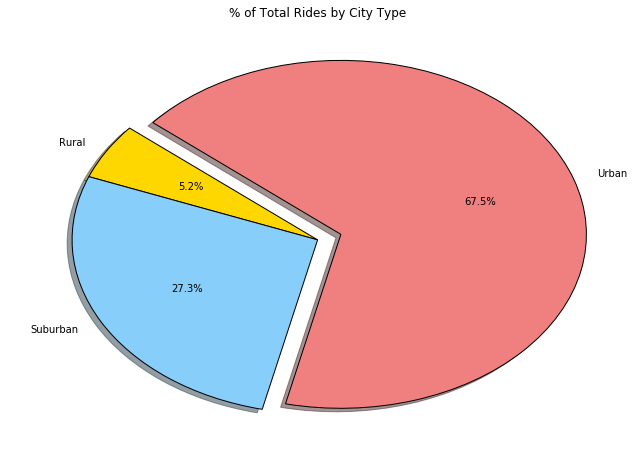

In [8]:
one = type_df["Total Rides"]
one = one.plot(kind='pie', figsize=(11, 8), explode=[0,0,0.1], startangle=140, 
               colors=["Gold", "lightskyblue", "lightcoral"],
               shadow=True,
               autopct="%1.1f%%",
               wedgeprops = {'edgecolor' : 'black'} 
              )
plt.title("% of Total Rides by City Type")
plt.ylabel("")
#plt.axis("equal")
plt.show()


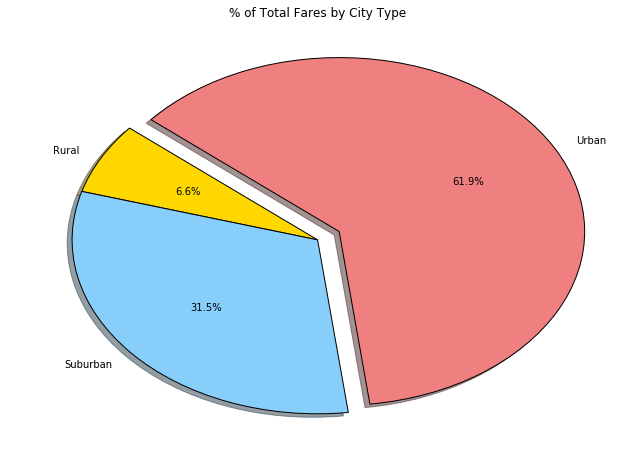

In [9]:
three = type_df["Total fares"]
three = three.plot(kind='pie', figsize=(11, 8), explode=[0,0,0.1], startangle=140, 
               colors=["Gold", "lightskyblue", "lightcoral"],
               shadow=True,
               autopct="%1.1f%%",
               wedgeprops = {'edgecolor' : 'black'} 
              )
plt.title("% of Total Fares by City Type")
plt.ylabel("")
plt.show()


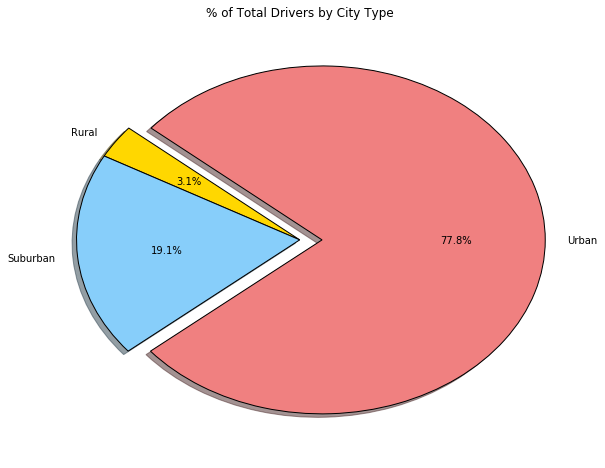

In [10]:
two = type_df["driver_count"]
two = two.plot(kind='pie', figsize=(10, 8), 
               explode=[0,0,0.1], startangle=140, 
               colors=["Gold", "lightskyblue", "lightcoral"],
               shadow=True,
               autopct="%1.1f%%",
               wedgeprops = {'edgecolor' : 'black'} 
              )
plt.title("% of Total Drivers by City Type")
plt.ylabel("")
plt.show()